In [2]:
pip install gdown

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import MultiPolygon
from tqdm import tqdm
import gdown
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode
init_notebook_mode(connected= True)
import plotly.express as px

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
file_id = "1U34r_SnEZNpIPXM-_lRDjlin3vbTN_sL"
url = f"https://drive.google.com/uc?export=download&id={file_id}"

# Download the file
gdown.download(url, "FD_SALAAN_2021.csv", quiet=False)

Downloading...
From (original): https://drive.google.com/uc?export=download&id=1U34r_SnEZNpIPXM-_lRDjlin3vbTN_sL
From (redirected): https://drive.google.com/uc?export=download&id=1U34r_SnEZNpIPXM-_lRDjlin3vbTN_sL&confirm=t&uuid=a322fc2b-202f-4dc5-b6c0-897d49a2f198
To: /home/onyxia/work/ML-for-econometrics---Project/FD_SALAAN_2021.csv
100%|██████████| 230M/230M [00:02<00:00, 82.7MB/s] 


'FD_SALAAN_2021.csv'

In [6]:
base = pd.read_csv("FD_SALAAN_2021.csv", delimiter=";")

/tmp/ipykernel_1130/3173851230.py:1: DtypeWarning:

Columns (0,1,3,24) have mixed types. Specify dtype option on import or set low_memory=False.



In [7]:
base.head()

,A6,A17,A38,CPFD,DATDEB,DATFIN,DEPR,DEPT,DOMEMPL,DOMEMPL_EM,DUREE,FILT,REGR,REGT,SEXE,PCS,TYP_EMPLOI,CONV_COLL,NBHEUR,NBHEUR_TOT,AGE,TRNNETO,TRALCHT,TREFF,CONT_TRAV,CS,AGE_TR,DATDEB_TR,DATFIN_TR,DUREE_TR,POND
0,BE,C5,CG,C,1.0,360.0,49,49,9.0,9.0,360.0,1,52.0,52.0,1,674A,O,292.0,1821.0,1821,44.0,15,99,6.0,CDI,67.0,47.0,1.0,12.0,12.0,12
1,BE,C5,CG,C,31.0,360.0,53,35,9.0,9.0,330.0,1,52.0,53.0,1,674A,O,292.0,1572.0,1731,44.0,12,99,3.0,CDI,67.0,47.0,2.0,12.0,11.0,12
2,BE,C5,CG,C,1.0,360.0,59,59,9.0,9.0,360.0,1,32.0,32.0,1,385B,O,292.0,1825.0,1825,44.0,20,99,3.0,CDI,38.0,47.0,1.0,12.0,12.0,12
3,BE,C5,CG,C,288.0,360.0,62,62,9.0,9.0,73.0,1,32.0,32.0,1,674A,O,292.0,364.0,364,44.0,6,99,4.0,CDD,67.0,47.0,10.0,12.0,3.0,12
4,BE,C5,CG,C,1.0,360.0,66,66,9.0,9.0,360.0,1,76.0,76.0,1,625C,O,292.0,1764.0,1764,44.0,15,99,3.0,CDI,62.0,47.0,1.0,12.0,12.0,12


PICO stands for
 • Population : Who are we interested in? : all French population in 2021 (all employed French population ?)
 • Intervention : What treatment/intervention do we study? : do we find a specific treatment ? related to sex/geography/PCS? determined by lasso selection ?
 • Comparison : What are we comparing it to? depends on the treatment
 •Outcome : What are we interested in? wages 

## Exploratory data analysis: descriptive analysis

In [ ]:
base.columns

In [ ]:
base.describe()

In [8]:
numerical_columns = [
    'DATDEB', 'DATFIN', #date début et fin de rémunération par rapport au 01/01
     'AGE', #age en années
     'POND', #pondération 1/12e
    'DUREE', #durée de paie en jours
]
categorical_columns = [
    'A6', 'A17', 'A38' #activité en nomenclature agrégrée
    'CPFD', #temps complet ou partiel
    'DEPR', 'DEPT', #département résidence et travail
    'DOMEMPL', 'DOMEMPL_EM', #domaine de l'emploi et l'établissement d'affectation/employeur
    
    'FILT', #indic poste annexe 2 ou non-annexe 1 (seuils rémunération volume)
    'REGR', 'REGT', #région de résidence et de travail
    'SEXE', #1 homme 2 femme
    'PCS', #PCS-ESE
    'TYP_EMPLOI', #ordinaire, apprenti, autre
    'CONV_COLL', #convention collective
    'NBHEUR', 'NBHEUR_TOT', #nombre d'heures salariées total (quelle diff?)
    'TRNNETO', #rémunération nette globale en tranches -> à passer en numérique ?
    'TRALCHT', #total des indémnités de chômage, en tranches -> passage en numérique ?
    'TREFF', #tranche d'effectif : de 0 à 250+ postes
    'CONT_TRAV', #contrat de travail : APP apprentissage, TOA occasionnel ou à l'acte, TTP intérim, AUTre
    'CS', #CSP mais code plus simple 
    'AGE_TR', #age en tranches quadriennales
    'DATDEB_TR',
       'DATFIN_TR', #dates début et fin rémunération en tranches
    'DUREE_TR', #durée de paie exprimée en jours en tranches mensuelles
]

In [ ]:
base['PCS'].describe()

In [ ]:
base['PCS'].value_counts()

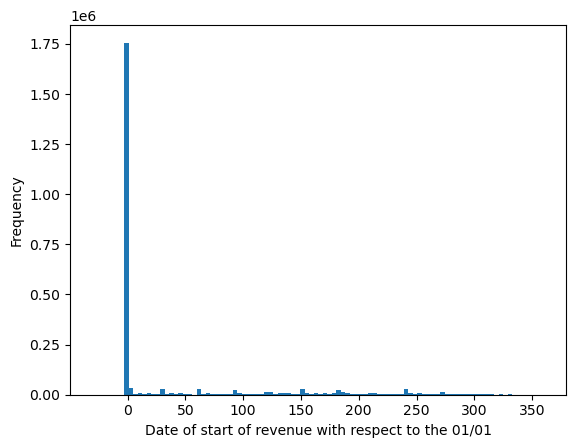

In [9]:
fig, ax = plt.subplots()
ax.hist(base['DATDEB'], bins=100, cumulative=False)
ax.set_xlabel('Date of start of revenue with respect to the 01/01')
ax.set_ylabel('Frequency')
plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.hist(base['DATDEB'], bins=100, cumulative=False, log=True)
ax.set_xlabel('Date of start of revenue')
ax.set_ylabel('Frequency')
plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.hist(base['DATFIN'], bins=100, cumulative=False)
ax.set_xlabel('Date of end of revenue with respect to the 01/01')
ax.set_ylabel('Frequency')
plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.hist(base['DATFIN'], bins=100, cumulative=False, log=True)
ax.set_xlabel('Date of end of revenue with respect to the 01/01')
ax.set_ylabel('Frequency')
plt.show()

In [ ]:
base['DOMEMPL'].value_counts()

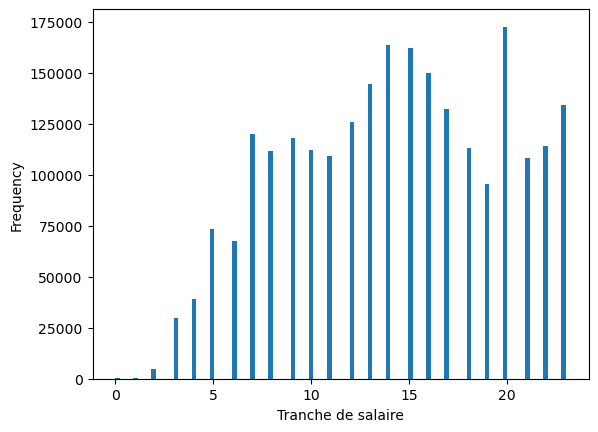

In [12]:
fig, ax = plt.subplots()
ax.hist(base['TRNNETO'], bins=100, cumulative=False)
ax.set_xlabel('Tranche de salaire')
ax.set_ylabel('Frequency')
plt.show()

In [11]:
base['TRNNETO'].value_counts()

TRNNETO
20    172700
14    163694
15    162269
16    149751
13    144555
23    134496
17    132108
12    125933
7     120161
9     118031
22    114143
18    113143
10    111997
8     111967
11    109501
21    108381
19     95396
5      73460
6      67358
4      39083
3      30022
2       4794
1        592
0        240
Name: count, dtype: int64

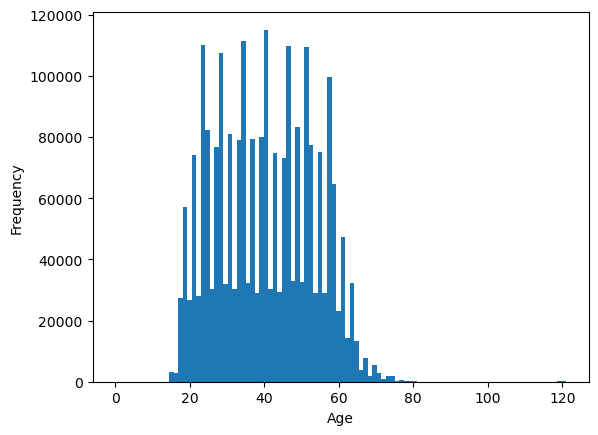

In [14]:
fig, ax = plt.subplots()
ax.hist(base['AGE'], bins=100, cumulative=False)
ax.set_xlabel('Age')
ax.set_ylabel('Frequency')
plt.show()

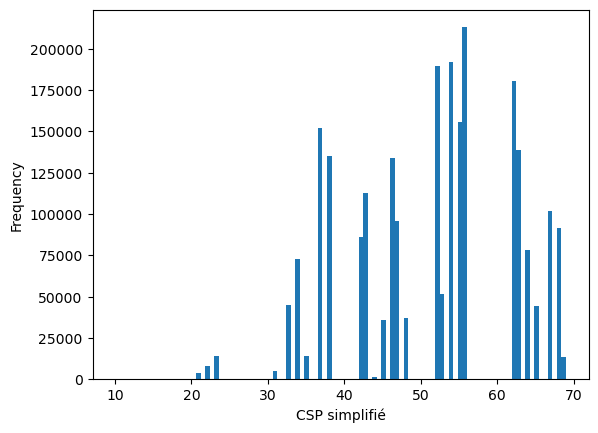

In [16]:
fig, ax = plt.subplots()
ax.hist(base['CS'], bins=100, cumulative=False)
ax.set_xlabel('CSP simplifié')
ax.set_ylabel('Frequency')
plt.show()

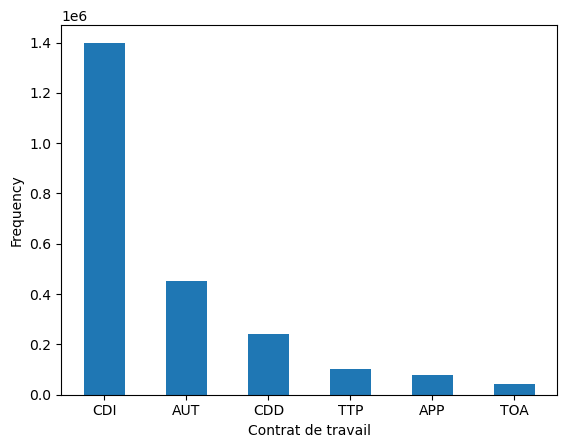

In [20]:
categories = base['CONT_TRAV'].value_counts().index
counts = base['CONT_TRAV'].value_counts().values
fig, ax = plt.subplots()
ax.bar(categories, counts, width=0.5)
ax.set_xlabel('Contrat de travail')
ax.set_ylabel('Frequency')
plt.show()

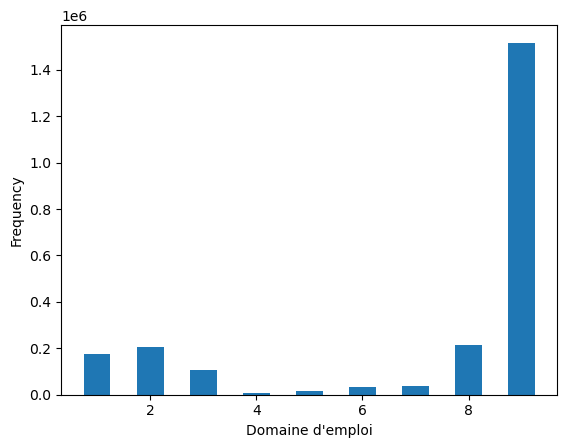

In [22]:
categories = base['DOMEMPL'].value_counts().index
counts = base['DOMEMPL'].value_counts().values
fig, ax = plt.subplots()
ax.bar(categories, counts, width=0.5)
ax.set_xlabel("Domaine d'emploi")
ax.set_ylabel('Frequency')
plt.show()
#9: autres sociétés privées

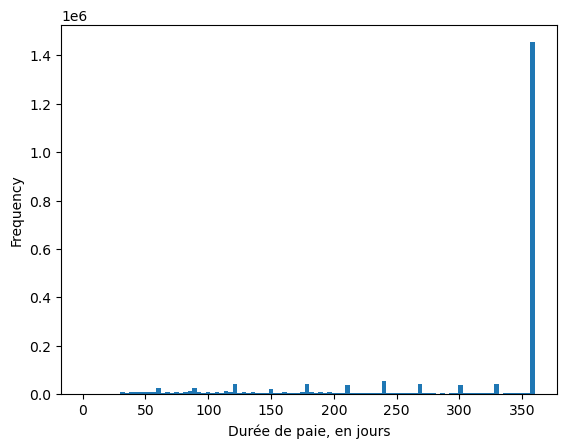

In [23]:
fig, ax = plt.subplots()
ax.hist(base['DUREE'], bins=100, cumulative=False)
ax.set_xlabel('Durée de paie, en jours')
ax.set_ylabel('Frequency')
plt.show()

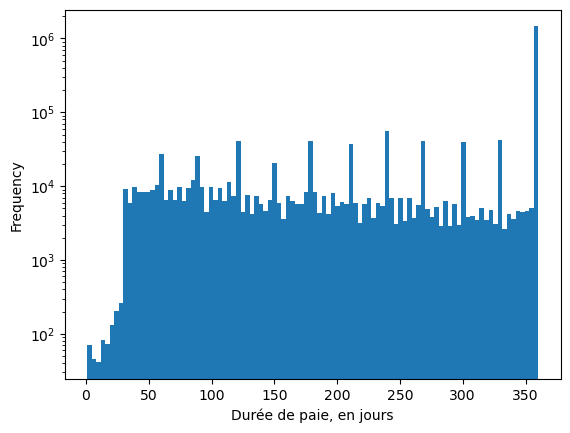

In [24]:
fig, ax = plt.subplots()
ax.hist(base['DUREE'], bins=100, cumulative=False, log=True)
ax.set_xlabel('Durée de paie, en jours')
ax.set_ylabel('Frequency')
plt.show()

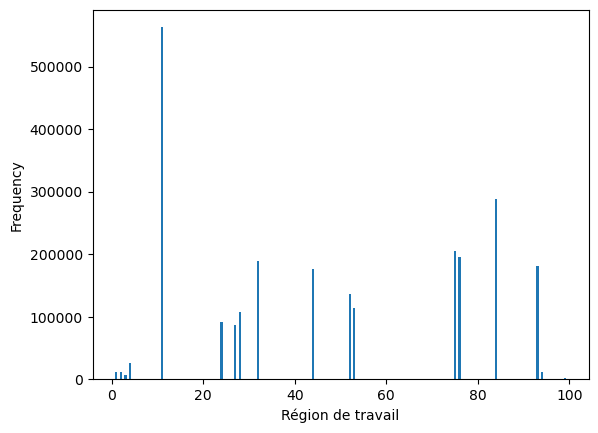

In [28]:
categories = base['REGT'].value_counts().index
counts = base['REGT'].value_counts().values
fig, ax = plt.subplots()
ax.bar(categories, counts, width=0.5)
ax.set_xlabel("Région de travail")
ax.set_ylabel('Frequency')
plt.show()

In [29]:
base['REGT'].value_counts()

REGT
11.0    562839
84.0    288042
75.0    205455
76.0    194823
32.0    188833
93.0    181436
44.0    175858
52.0    136342
53.0    114210
28.0    107223
24.0     90928
27.0     87176
4.0      26277
2.0      11945
94.0     11927
1.0      11632
3.0       6750
99.0      1856
Name: count, dtype: int64

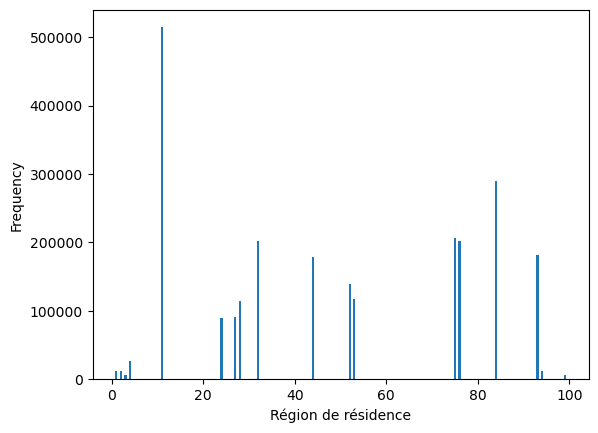

In [30]:
categories = base['REGR'].value_counts().index
counts = base['REGR'].value_counts().values
fig, ax = plt.subplots()
ax.bar(categories, counts, width=0.5)
ax.set_xlabel("Région de résidence")
ax.set_ylabel('Frequency')
plt.show()

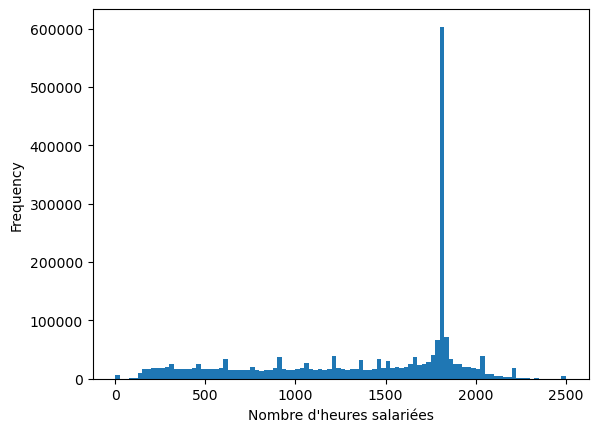

In [33]:
fig, ax = plt.subplots()
ax.hist(base['NBHEUR'], bins=100, cumulative=False)
ax.set_xlabel("Nombre d'heures salariées")
ax.set_ylabel('Frequency')
plt.show()